In [1]:
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.join('./', 'nlmpy'))
from nlmpy import nlmpy
import numpy as np
import itertools
import random

# Using Cons Bio Paper Landscape Sim Method: TODO

# Using NLMPY

In [2]:
RANDSEED = 1357
random.seed(RANDSEED)
np.random.seed(RANDSEED)

In [3]:
NUM_ROWS = 50
NUM_COLS = 50

[[0.15888627 0.18413411 0.20338102 ... 0.75057578 0.77158813 0.79527763]
 [0.14169867 0.17272858 0.19277916 ... 0.73668842 0.75343078 0.77524911]
 [0.12792807 0.1567418  0.17698028 ... 0.72569313 0.73173498 0.74901565]
 ...
 [0.23089102 0.27874144 0.30066304 ... 0.23028931 0.23075762 0.23010852]
 [0.21866164 0.25198409 0.29039078 ... 0.22273908 0.21485559 0.21569253]
 [0.20306602 0.23316699 0.26638679 ... 0.21411411 0.20609181 0.20112449]]


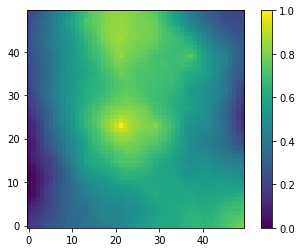

In [4]:
rastervals = nlmpy.mpd(NUM_ROWS, NUM_ROWS, 1.5)
# rastervals = (rastervals - np.mean(rastervals)) / np.std(rastervals) # should we standardize?
print(rastervals)
plt.imshow(rastervals, origin='lower')
plt.colorbar()

# Test Generated Raster with Simulation Code

## Simulate individual activity centers

In [5]:
def lambda_ipp_log_linear(x, beta0, beta1):
    """
    Rate function for an inhomogeneous poisson process, in which
    the intensity is a log-linear function of x.

    lambda = exp(beta0 + beta1*x)
    """
    return np.exp(beta0 + beta1*x)


def simulate_ipp(N, raster, n_real=1, seed=1111):
    """
    Simulates a spatial inhomogeneous Poisson process over 2D raster.
    Simulation is done using the Lewis and Schedler thinning algorithm.

    Args:
    N           - number of point events to simulate per realizition
    raster      - raster over which to simulate the IPP
    n_real      - number of realizations of the IPP to simulate
    seed        - random seed for the simulation

    Returns:
    points      - list of n_real lists; each sublist contains N tuples (x, y) specifying spatial 
                  points for one realization of the IPP.
    """
    np.random.seed(seed)

    n_pixels = np.prod(raster.shape)
    beta0 = np.log(float(N)/n_pixels)
    beta1 = -3
    min_rast_val = np.amin(raster)
    max_rast_val = np.amax(raster)
    lambda_max = max(lambda_ipp_log_linear(min_rast_val, beta0, beta1), lambda_ipp_log_linear(max_rast_val, beta0, beta1))
    
    points = [] # list points in each realization of the IPP
    for rno in range(n_real):
        counter = 0
        rpoints = [] # list of points for a single IPP realization
        while counter < N:
            x_coord = np.random.uniform(0, raster.shape[0], 1)[0]
            y_coord = np.random.uniform(0, raster.shape[1], 1)[0]
            z_val = raster[int(np.floor(x_coord)), int(np.floor(y_coord))]
            lambda_xy = lambda_ipp_log_linear(z_val, beta0, beta1)
            coin = np.random.uniform(0, 1, 1)[0]
            if coin < lambda_xy/lambda_max:
                counter += 1
                rpoints.append((x_coord, y_coord))
        points.append(rpoints)
    return points

In [6]:
ac_realizations = simulate_ipp(100, rastervals, n_real=1, seed=RANDSEED)


(0, 50)

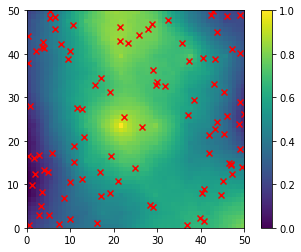

In [7]:
plt.imshow(rastervals, origin='lower', extent=(0, NUM_ROWS, 0, NUM_COLS))
plt.colorbar()
ac_x_coords = [t[0] for t in ac_realizations[0]]
ac_y_coords = [t[1] for t in ac_realizations[0]]
plt.scatter(ac_y_coords, ac_x_coords, c='r', marker='x')
plt.xlim([0, NUM_ROWS])
plt.ylim([0, NUM_COLS])

## Create grid layout for detectors

In [8]:
def create_grid_layout(n, m, raster, buffer=0.1):
    n_pix_h, n_pix_w = raster.shape
    grid_xmin = n_pix_h*buffer
    grid_xmax = n_pix_h*(1-buffer)
    grid_ymin = n_pix_w*buffer
    grid_ymax = n_pix_w*(1-buffer)

    grid_x = np.linspace(grid_xmin, grid_xmax, n)
    grid_y = np.linspace(grid_ymin, grid_ymax, m)
    grid_loc = list(itertools.product(grid_x, grid_y))

    return grid_loc

In [9]:
# the real-world trap config has 67 traps (prime number!)
# for approx comparison here we use 66 traps in a grid layout
# then, we can compare this grid layout with the real-world layout on this simulated landscape
grid_trap_loc = create_grid_layout(11, 6, rastervals)


Text(0, 0.5, 'Raster Cell Coords in Latitude Direction')

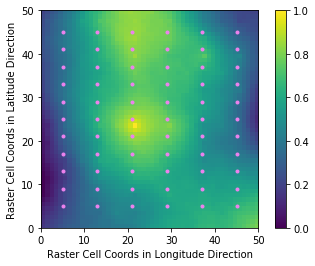

In [10]:
plt.imshow(rastervals, origin='lower', extent=(0, NUM_ROWS, 0, NUM_COLS))
plt.colorbar()
trap_x_coords = [t[0] for t in grid_trap_loc]
trap_y_coords = [t[1] for t in grid_trap_loc]
plt.scatter(trap_y_coords, trap_x_coords, c='violet', marker='.')
plt.xlim([0, NUM_ROWS])
plt.ylim([0, NUM_COLS])
plt.xlabel('Raster Cell Coords in Longitude Direction')
plt.ylabel('Raster Cell Coords in Latitude Direction')

[21.264751333993715, 42.719156300714204, 15.050863589006925, 5.3452805045468015, 6.8514839793071936, 25.924655541739067, 46.65800522667761, 10.426132776484852, 8.14361678687066, 22.82716248809951, 34.46566962760471, 7.543643460262911, 17.107233651560822, 1.4753989442164994, 42.46837476598596, 41.56866385111794, 10.812849082084735, 44.09487633268046, 38.77206737250827, 0.5975461168453822, 20.871222517210487, 7.418840205614519, 8.956806389460581, 31.263417247982517, 48.85363784470787, 16.495740826274297, 2.1397988747282994, 2.926357802828272, 4.844500092951626, 45.04108399039321, 49.8298474472569, 45.62474420447992, 41.44451636361491, 41.094459153040525, 27.376835235144732, 14.06776391048188, 33.552187213487144, 23.166971128521347, 31.17093530553498, 33.061438319684825, 38.75183337652335, 48.472634021308856, 18.740816455775022, 38.37902996308397, 16.483880658422624, 36.376850016699166, 32.845281733790394, 46.22304922588774, 48.26537790749424, 13.396709619831515, 8.04084175721551, 8.04440

(0, 50)

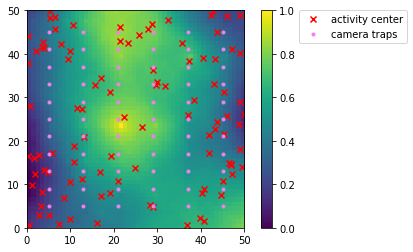

In [11]:
# Visualize together
plt.imshow(rastervals, origin='lower', extent=(0, NUM_ROWS, 0, NUM_COLS))
plt.colorbar()
trap_x_coords = [t[0] for t in grid_trap_loc]
trap_y_coords = [t[1] for t in grid_trap_loc]
ac_x_coords = [t[0] for t in ac_realizations[0]]
ac_y_coords = [t[1] for t in ac_realizations[0]]
print(ac_x_coords)
plt.scatter(ac_y_coords, ac_x_coords, c='r', marker='x', label='activity center')
plt.scatter(trap_y_coords, trap_x_coords, c='violet', marker='.', label='camera traps')
plt.legend(loc=(1.25,0.85))
plt.xlim([0, NUM_ROWS])
plt.ylim([0, NUM_COLS])

## Load trap locations from file

-2.30057
-2.3535
113.91516999999999
113.80616


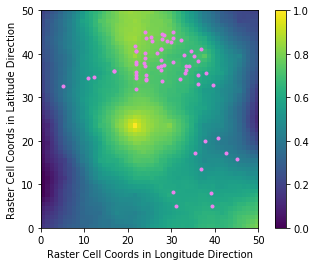

In [12]:
import pandas as pd
data = pd.read_csv('../sebangau lat long 1 loc.csv')

# LATITUDE AND LONGITUDE COLUMN NAMES ARE MIXED UP
# CORRECT HERE
data['Longitude_tmp'] = data['Longitude']
data['Longitude'] = data['Latitude']
data['Latitude'] = data['Longitude_tmp']
del data['Longitude_tmp']

max_latitude = data['Latitude'].max()
min_latitude = data['Latitude'].min()
max_longitude = data['Longitude'].max()
min_longitude = data['Longitude'].min()
print(max_latitude)
print(min_latitude)
print(max_longitude)
print(min_longitude)
# Convert each longitude value into an x coordinate in the range [0,50)
# and each longitude value into a y coordinate in the range [0,50)
# NOTE: to avoid edge-effects, place traps in the middle 80% of the square
trap_x_coords = []
for lon in data['Longitude']:
    rasterv = ((lon-min_longitude)/(max_longitude-min_longitude)) * 0.8*NUM_COLS + 0.1*NUM_COLS
    trap_x_coords.append(rasterv)
trap_y_coords = []
for lat in data['Latitude']:
    rasterv = ((lat-min_latitude)/(max_latitude-min_latitude)) * 0.8*NUM_ROWS + 0.1*NUM_ROWS
    trap_y_coords.append(rasterv)

# Plot
plt.imshow(rastervals, origin='lower', extent=(0, NUM_ROWS, 0, NUM_COLS))
plt.colorbar()
plt.scatter(trap_y_coords, trap_x_coords, c='violet', marker='.')
plt.xlim([0, NUM_ROWS])
plt.ylim([0, NUM_COLS])
plt.xlabel('Raster Cell Coords in Longitude Direction')
plt.ylabel('Raster Cell Coords in Latitude Direction')

# Gather trap locations as a list of tuples
# (same format as grid trap layout generator)
real_trap_loc = list(zip(trap_x_coords, trap_y_coords))


In [13]:
data.head()

,Longitude,Latitude
0,113.88552,-2.31778
1,113.88971,-2.30993
2,113.88175,-2.30771
3,113.88845,-2.31236
4,113.88286,-2.31236


(0, 50)

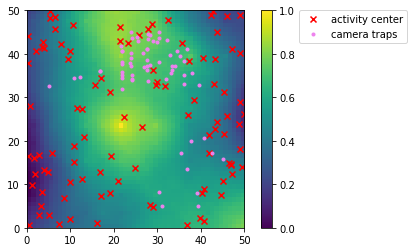

In [14]:
# Visualize together
plt.imshow(rastervals, origin='lower', extent=(0, NUM_ROWS, 0, NUM_COLS))
plt.colorbar()
trap_x_coords = [t[0] for t in real_trap_loc]
trap_y_coords = [t[1] for t in real_trap_loc]
plt.scatter(ac_y_coords, ac_x_coords, c='r', marker='x', label='activity center')
plt.scatter(trap_y_coords, trap_x_coords, c='violet', marker='.', label='camera traps')
plt.legend(loc=(1.25,0.85))
plt.xlim([0, NUM_ROWS])
plt.ylim([0, NUM_COLS])

In [15]:
import rasterio
from rasterio.transform import from_origin
from rasterio.crs import CRS
from utils import find_lcp_to_pts
def simulate_capture_histories(ac, tl, K, lcp_dist, alpha0, alpha1, n_real=50, seed=1111):
    """
    Simulates a capture history for a simulated spatial capture-recapture study.
    Assumes multiple individuals can be detected at each detector in a given sampling
    occasion--but multiple detections of the same individual at the same trap in a
    single sampling occasion are indistinguishable.
    Args:
    ac          - list of tuples (x,y) storing activity center locations
    tl          - list of tuples (x,y) storing trap locations
    K           - number of sampling occasions
    lcp_dist    - least cost paths between each trap and every raster pixel
    alpha0      - capture probability parameter
    alpha1      - home range parameter
    n_real      - number of realizations of the capture history to simulate
    seed        - random seed for the simulation
    Returns:
    detections  - matrix of the number of times each individual was detected at
                  each detector
    """
    n_individuals = len(ac)
    n_traps = len(tl)
    detections = []
    for rno in range(n_real):
        rdetections = np.ndarray((n_individuals, n_traps))
        for ni in range(len(ac)):
            s = ac[ni]
            sx = int(np.floor(s[0]))
            sy = int(np.floor(s[1]))
            for nt in range(len(tl)):
                dist = lcp_dist[nt, sx, sy]
                prob_cap = (1/(1+np.exp(alpha0)))*np.exp(-alpha1*dist*dist)
                n_det = np.random.binomial(K, prob_cap)
                rdetections[ni, nt] = n_det
        rdetections = rdetections[~np.all(rdetections==0, axis=1)]
        detections.append(rdetections)
    return(detections)

In [16]:
ALPHA0 = 0.05
ALPHA1 = 0.15
ALPHA2 = 2.25
RASTER_CELL_SIZE = 0.25


In [17]:
grid_lcp_distances = find_lcp_to_pts(rastervals, 
                                     ALPHA2, grid_trap_loc, 
                                     raster_cell_size=RASTER_CELL_SIZE)
grid_layout_capture_histories = simulate_capture_histories(ac_realizations[0], 
                                                           grid_trap_loc, 10, 
                                                           grid_lcp_distances, 
                                                           ALPHA0, ALPHA1, n_real=1)

real_lcp_distances = find_lcp_to_pts(rastervals, 
                                     ALPHA2, real_trap_loc, 
                                     raster_cell_size=RASTER_CELL_SIZE)
real_layout_capture_histories = simulate_capture_histories(ac_realizations[0], 
                                                           real_trap_loc, 10, 
                                                           real_lcp_distances, 
                                                           ALPHA0, ALPHA1, n_real=1)


# max_aclatitude = max(ac_y_coords)
# min_aclatitude = min(ac_y_coords)
# max_aclongitude = max(ac_x_coords)
# min_aclongitude = min(ac_x_coords)
# raster_x_coords = []
# for lon in ac_x_coords:
#     rasterv = ((lon-min_aclongitude)/(max_aclongitude-min_aclongitude)) * 0.8*NUM_COLS + 0.1*NUM_COLS
#     raster_x_coords.append(rasterv)
# raster_y_coords = []
# for lat in ac_y_coords:
#     rasterv = ((lat-min_aclatitude)/(max_aclatitude-min_aclatitude)) * 0.8*NUM_ROWS + 0.1*NUM_ROWS
#     raster_y_coords.append(rasterv)
    
# First, convert grid coordinates to same lat-long range as real trap locations
# raster_x_coords = []
# raster_y_coords = []
# for lon_ in ac_x_coords:
#     lon = (max_longitude-min_longitude)*(lon_/NUM_COLS) + min_longitude
#     raster_x_coords.append(lon)
# for lat_ in ac_y_coords:
#     lat = (max_latitude-min_latitude)*(lat_/NUM_ROWS) + min_latitude
#     ac_y_coords.append(lat)

raster_x_coords = []
raster_y_coords = []
for x,y in ac_realizations[0]:
    lon = (max_longitude-min_longitude)*(x/NUM_COLS) + min_longitude
    raster_x_coords.append(lon)
    lat = (max_latitude-min_latitude)*(y/NUM_ROWS) + min_latitude
    raster_y_coords.append(lat)
    
activity_data = pd.DataFrame()
activity_data['Longitude'] = raster_x_coords
activity_data['Latitude'] = raster_y_coords
activity_data.to_csv('sebangau_activity_center_summary.csv')
activity_data.head()

print(ac_realizations[0])
# print(grid_trap_loc)

[(21.264751333993715, 41.95327858878659), (42.719156300714204, 3.820292149611854), (15.050863589006925, 10.879441787624632), (5.3452805045468015, 28.274929106575087), (6.8514839793071936, 8.601977882002116), (25.924655541739067, 37.14218133338614), (46.65800522667761, 10.732456690670556), (10.426132776484852, 9.883040655678133), (8.14361678687066, 3.5054236562639343), (22.82716248809951, 43.31148434663638), (34.46566962760471, 17.148123812352488), (7.543643460262911, 44.727100411370294), (17.107233651560822, 41.88406454844385), (1.4753989442164994, 40.749762901722406), (42.46837476598596, 35.78341362372109), (41.56866385111794, 3.5198907077008954), (10.812849082084735, 20.90066302796645), (44.09487633268046, 0.18087117500708016), (38.77206737250827, 9.412554046665633), (0.5975461168453822, 36.88525867645792), (20.871222517210487, 13.046228010013628), (7.418840205614519, 17.058476938216057), (8.956806389460581, 40.79809255443831), (31.263417247982517, 45.25808339124466), (48.85363784470

In [18]:
print(grid_layout_capture_histories[0].shape)
print(real_layout_capture_histories[0].shape)

(89, 66)
(39, 67)


In [19]:
def num_total_detections_per_trap(cap_hist):
    return [int(s) for s in np.sum(cap_hist, axis=0)]

def num_unique_detections_per_trap(cap_hist):
    return np.sum(cap_hist>0, axis=0)

In [20]:
simulation_no = 0

print('Grid Trap Layout:')
print('\tNumber of detections per trap:')
grid_tot = num_total_detections_per_trap(grid_layout_capture_histories[simulation_no])
print(grid_tot)
print('\tNumber of unique individuals detected per trap:')
grid_unique = num_unique_detections_per_trap(grid_layout_capture_histories[simulation_no])
print(grid_unique)

print('\nReal Trap Layout:')
print('\tNumber of detections per trap:')
real_tot = num_total_detections_per_trap(real_layout_capture_histories[simulation_no])
print(real_tot)
print('\tNumber of unique individuals detected per trap:')
real_unique = num_unique_detections_per_trap(real_layout_capture_histories[simulation_no])
print(real_unique)

Grid Trap Layout:
	Number of detections per trap:
[34, 5, 1, 7, 1, 3, 50, 9, 12, 0, 0, 7, 37, 8, 2, 0, 0, 20, 29, 1, 1, 0, 1, 19, 11, 3, 0, 0, 4, 22, 6, 4, 3, 0, 6, 26, 4, 3, 0, 1, 4, 11, 1, 1, 1, 12, 0, 13, 10, 0, 0, 3, 4, 7, 21, 1, 4, 0, 1, 12, 14, 1, 4, 3, 0, 22]
	Number of unique individuals detected per trap:
[14  4  1  2  1  1 17  4  3  0  0  3 12  4  2  0  0  7 13  1  1  0  1  9
  8  2  0  0  4 10  3  2  1  0  2  9  2  2  0  1  2  5  1  1  1  4  0  5
  4  0  0  1  1  5  7  1  2  0  1  6  7  1  2  2  0  7]

Real Trap Layout:
	Number of detections per trap:
[4, 2, 4, 1, 0, 13, 6, 23, 0, 5, 0, 0, 0, 1, 5, 0, 0, 4, 0, 11, 8, 11, 2, 0, 1, 0, 3, 1, 0, 0, 1, 3, 6, 3, 0, 0, 2, 0, 0, 4, 0, 0, 5, 3, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 5, 0, 0, 0, 3, 1, 0, 0, 6, 0, 0, 0]
	Number of unique individuals detected per trap:
[3 1 2 1 0 6 4 8 0 4 0 0 0 1 1 0 0 3 0 2 4 2 2 0 1 0 1 1 0 0 1 1 3 2 0 0 1
 0 0 2 0 0 2 2 0 0 1 1 1 2 0 0 0 0 2 2 0 0 0 1 1 0 0 2 0 0 0]


In [21]:
data['Total Detections'] = real_tot
data['Unique Detections'] = real_unique
data.to_csv('sebangau_real_layout_caphist_summary.csv')
data.head()


,Longitude,Latitude,Total Detections,Unique Detections
0,113.88552,-2.31778,4,3
1,113.88971,-2.30993,2,1
2,113.88175,-2.30771,4,2
3,113.88845,-2.31236,1,1
4,113.88286,-2.31236,0,0


In [22]:
# Save the grid layout results also

# First, convert grid coordinates to same lat-long range as real trap locations
grid_trap_lon = []
grid_trap_lat = []
for x,y in grid_trap_loc:
    lon = (max_longitude-min_longitude)*(x/NUM_COLS) + min_longitude
    grid_trap_lon.append(lon)
    lat = (max_latitude-min_latitude)*(y/NUM_ROWS) + min_latitude
    grid_trap_lat.append(lat)

grid_data = pd.DataFrame()
grid_data['Longitude'] = grid_trap_lon
grid_data['Latitude'] = grid_trap_lat
grid_data['Total Detections'] = grid_tot
grid_data['Unique Detections'] = grid_unique
data.to_csv('sebangau_grid_layout_caphist_summary.csv')
grid_data.head()

,Longitude,Latitude,Total Detections,Unique Detections
0,113.817061,-2.348207,34,14
1,113.817061,-2.339738,5,4
2,113.817061,-2.331269,1,1
3,113.817061,-2.322801,7,2
4,113.817061,-2.314332,1,1


1
1
2
2
3
3
[(21.264751333993715, 41.95327858878659), (42.719156300714204, 3.820292149611854), (15.050863589006925, 10.879441787624632), (5.3452805045468015, 28.274929106575087), (6.8514839793071936, 8.601977882002116), (25.924655541739067, 37.14218133338614), (46.65800522667761, 10.732456690670556), (10.426132776484852, 9.883040655678133), (8.14361678687066, 3.5054236562639343), (22.82716248809951, 43.31148434663638), (34.46566962760471, 17.148123812352488), (7.543643460262911, 44.727100411370294), (17.107233651560822, 41.88406454844385), (1.4753989442164994, 40.749762901722406), (42.46837476598596, 35.78341362372109), (41.56866385111794, 3.5198907077008954), (10.812849082084735, 20.90066302796645), (44.09487633268046, 0.18087117500708016), (38.77206737250827, 9.412554046665633), (0.5975461168453822, 36.88525867645792), (20.871222517210487, 13.046228010013628), (7.418840205614519, 17.058476938216057), (8.956806389460581, 40.79809255443831), (31.263417247982517, 45.25808339124466), (48

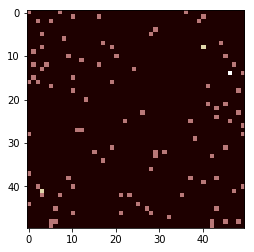

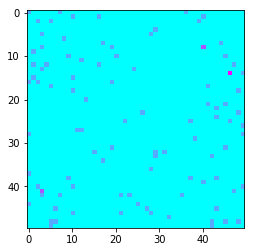

float32
(50, 50)


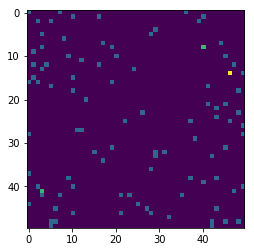

<Figure size 432x288 with 0 Axes>

float32
(288, 432, 4)


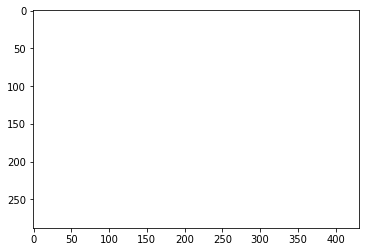

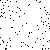

In [30]:
grid_activity_count = []
# for row in range(0,NUM_ROWS):
#     cols = []
#     for col in range(0,NUM_COLS):
#         cols.append(0)
#     grid_activity_count.append(col)
max_count = 0
for row in range(0,NUM_ROWS):
    cols = []
    for col in range(0,NUM_COLS):
        count = 0
        for (x,y) in ac_realizations[0]:
            if x > row and x < (row+1):
                if y > col and y < (col+1):
                    # print(row,col,x,y)
                    count += 1
                    # grid_activity_count[row][col] += 1
        
        if(count > max_count):
            max_count = count
            print(count)
            print(max_count)
        cols.append(count)
    grid_activity_count.append(cols)
            # print(row,col,x,y)
            #print(grid_activity_count[row][col]
print(ac_realizations[0])
print(len(grid_activity_count))
print(len(grid_activity_count[0]))
print(grid_activity_count)
print(max_count)
np.array(grid_activity_count)
np.true_divide(grid_activity_count, max_count)
print(grid_activity_count)
# make np array 
grid_counts = np.array(grid_activity_count).astype(rasterio.uint8)
x_size = (max_longitude - min_longitude) / 50
y_size = (max_latitude - min_latitude) / 50
transform = from_origin(min_longitude, max_latitude, x_size, y_size)

# ground truth 
new_dataset = rasterio.open('test1.tif', 'w', driver='GTiff',
                            height = grid_counts.shape[0], width = grid_counts.shape[1],
                            count=1, dtype=rasterio.uint8,
                            crs=CRS.from_epsg(4326),
                            transform=transform, nodata=0.0)

new_dataset.write(grid_counts, 1)
new_dataset.close()


src = rasterio.open("test1.tif")
plt.imshow(src.read(1), cmap='pink')
plt.show()
# what form is a raster - find example of someone overlaying raster on a map 
# convert into giotif 
# crs use rasterio link 
# smallest longititude (min x) and largest latitude (max y) are used in from_origin
# take max longitude and subtract min longitude - tells number of degrees between and divide by 50 for east west direction (x size)
# y size from difference of latitudes divided by 50

# import osgeo
# from osgeo import gdal
# ds = gdal.Open('test1.tif')
# ds = gdal.Translate('output.tif',ot,UInt16)
tif_filename = 'test1.tif'
with rasterio.open(tif_filename) as infile:
    profile=infile.profile
    #
    # change the driver name from GTiff to PNG
    #
    profile['driver']='PNG'
    #
    # pathlib makes it easy to add a new suffix to a
    # filename
    #    
    png_filename='tif.png'
    raster=infile.read()
    with rasterio.open(png_filename, 'w', **profile) as dst:
        dst.write(raster)
        
    profile['driver']='JPEG'
    jpeg_filename='tif.jpeg'
    with rasterio.open(jpeg_filename, 'w', **profile) as dst:
        dst.write(raster)
        

tif_f = 'test2.tiff'
with rasterio.open(tif_f,'w',driver='GTiff',
                   height = grid_counts.shape[0], width = grid_counts.shape[1],
                            count=1, dtype=rasterio.uint8,
                            crs=CRS.from_epsg(4326),
                            transform=transform, nodata=0.0) as dst:
        dst.write(grid_counts, 1)
src = rasterio.open("test2.tiff")
plt.imshow(src.read(1), cmap='cool')
plt.show()

tif_filename2 = 'test2.tiff'
with rasterio.open(tif_filename2) as infile:
    profile=infile.profile
    #
    # change the driver name from GTiff to PNG
    #
    profile['driver']='PNG'
    profile['photometric'] = "RGB"
    #
    # pathlib makes it easy to add a new suffix to a
    # filename
    #    
#     png_filename='tif.png'
#     raster=infile.read()
#     with rasterio.open(png_filename, 'w', **profile) as dst:
#         dst.write(raster)
        
    #profile['driver']='JPEG'
    png_filename='tif3.png'
    with rasterio.open(png_filename, 'w', **profile) as dst:
        dst.write(raster)

from PIL import Image
im = Image.open('test1.tif')
im.save('test.jpeg')


# image = Image.open('tif.png')
# print(image.format)
# print(image.size)
# print(image.mode)
# image = image.convert('RGB')
# print(image.format)
# print(image.size)
# print(image.mode)
# image.save('tiftest.png')
from matplotlib import image

img = image.imread('tif3.png')
print(img.dtype)
print(img.shape)
# display the array of pixels as an image
plt.imshow(img)
plt.show()
plt.savefig('demo.png', transparent=True)
plt.show()
image.imsave("out.png", img)


img2 = image.imread('demo.png')
print(img2.dtype)
print(img2.shape)
# display the array of pixels as an image
plt.imshow(img2)
plt.show()

# image2 = image.imread('tiftest.png')
# print(image2.dtype)
# print(image2.shape)
# # display the array of pixels as an image
# plt.imshow(image2)
# plt.show()

from IPython.display import Image
Image(str(png_filename))